## Imports

In [258]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

## Load Data and Pre Processing

In [259]:
file_path = "abalone.data"

column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
                'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

df = pd.read_csv(file_path, names=column_names)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [260]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [261]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [262]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

## Check and Eliminate Multicollinearity

In [263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [264]:
indep = df[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
                'Shucked weight', 'Viscera weight', 'Shell weight']]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,Sex,2.555356
1,Length,700.488988
2,Diameter,749.121626
3,Height,42.128924
4,Whole weight,421.652484
5,Shucked weight,101.674946
6,Viscera weight,63.585627
7,Shell weight,81.873737


In [265]:
indep = df[['Sex', 'Length', 'Height', 'Whole weight', 
                'Shucked weight', 'Viscera weight', 'Shell weight']]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,Sex,2.554529
1,Length,44.305083
2,Height,41.550103
3,Whole weight,421.393751
4,Shucked weight,101.647168
5,Viscera weight,63.500313
6,Shell weight,80.852236


In [266]:
indep = df[['Sex', 'Length', 'Height', 
                'Shucked weight', 'Viscera weight', 'Shell weight']]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,Sex,2.554057
1,Length,44.219459
2,Height,41.539511
3,Shucked weight,29.897229
4,Viscera weight,38.332632
5,Shell weight,26.298910


In [267]:
indep = df[['Sex', 'Height', 
                'Shucked weight', 'Viscera weight', 'Shell weight']]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,Sex,2.352382
1,Height,12.753323
2,Shucked weight,29.499793
3,Viscera weight,38.288814
4,Shell weight,26.292290


In [268]:
indep = df[['Sex', 'Height', 
                'Shucked weight', 'Shell weight']]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,Sex,2.336274
1,Height,12.520119
2,Shucked weight,16.843479
3,Shell weight,21.364100


In [269]:
indep = df[['Sex', 'Height', 'Shucked weight']]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,Sex,2.294538
1,Height,9.610697
2,Shucked weight,7.696468


In [270]:
new_df = df[['Sex', 'Height', 'Shucked weight', "Rings"]]

## Train KNN Regressor

#### Before Removing Multicollinearity

In [271]:
train, test = train_test_split(df, test_size=0.3, random_state=1)

x_train = train.drop("Rings", axis=1)
y_train = train["Rings"]

x_test = test.drop("Rings", axis=1)
y_test = test["Rings"]

In [272]:
rmse_val = []
k_list = []

for K in range(75):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K)

    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    k_list.append(K)

Lowest RMSE: 2.18221672182604
Lowest RMSE K value: 15


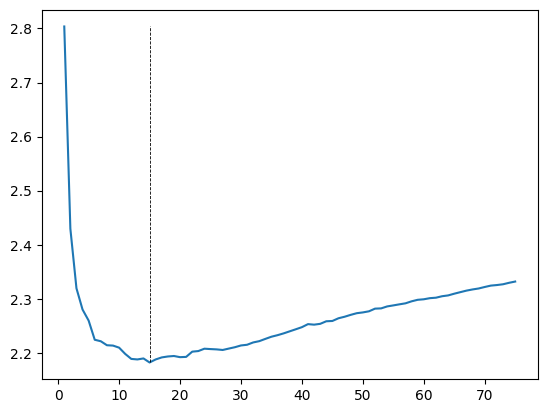

In [273]:
plt.plot(k_list, rmse_val)
plt.vlines([k_list[rmse_val.index(min(rmse_val))]], ymax=max(rmse_val), ymin=min(rmse_val), color="black", ls="--", lw=0.6)
print(f"Lowest RMSE: {min(rmse_val)}")
print(f"Lowest RMSE K value: {k_list[rmse_val.index(min(rmse_val))]}")

#### After Removing Multicollinearity

In [274]:
train, test = train_test_split(new_df, test_size=0.3, random_state=1)

x_train = train.drop("Rings", axis=1)
y_train = train["Rings"]

x_test = test.drop("Rings", axis=1)
y_test = test["Rings"]

In [275]:
rmse_val = []
k_list = []

for K in range(75):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K)

    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    k_list.append(K)

Lowest RMSE: 2.491038686228854
Lowest RMSE K value: 14


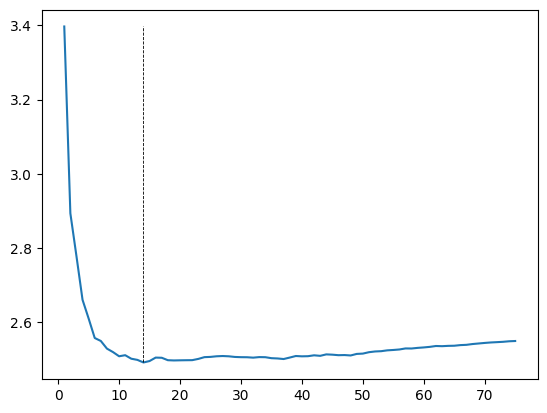

In [276]:
plt.plot(k_list, rmse_val)
plt.vlines([k_list[rmse_val.index(min(rmse_val))]], ymax=max(rmse_val), ymin=min(rmse_val), color="black", ls="--", lw=0.6)
print(f"Lowest RMSE: {min(rmse_val)}")
print(f"Lowest RMSE K value: {k_list[rmse_val.index(min(rmse_val))]}")